In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bankMARKETING.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [8]:
df.education.dtype

dtype('O')

*Numerical variables

1.AGE


<Axes: xlabel='age', ylabel='Density'>

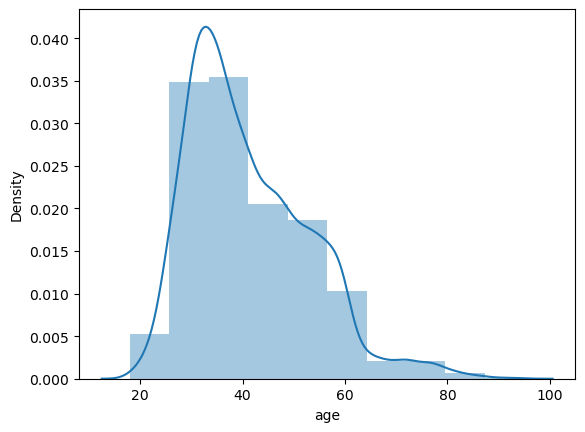

In [9]:
sns.distplot(df.age,bins=10)

In [10]:
from scipy.stats import kurtosis
from scipy.stats import skew

K=kurtosis(df['age'])
s=skew(df['age'])
print('k:',K)
print('s:',s)

k: 0.6207244197145583
s: 0.8626636888266407


<Axes: xlabel='age', ylabel='Density'>

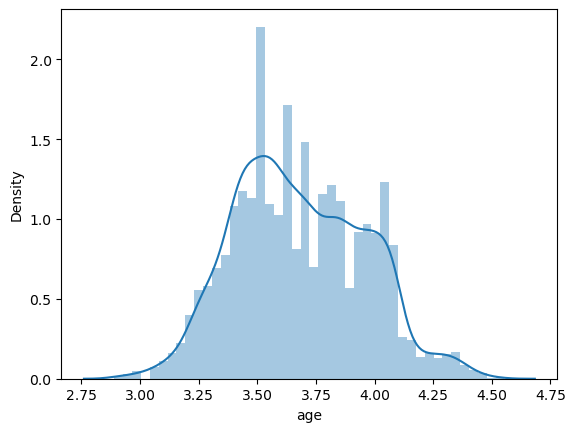

In [11]:
df['age']=df['age'].apply(np.log)

sns.distplot(df['age'])

<Axes: >

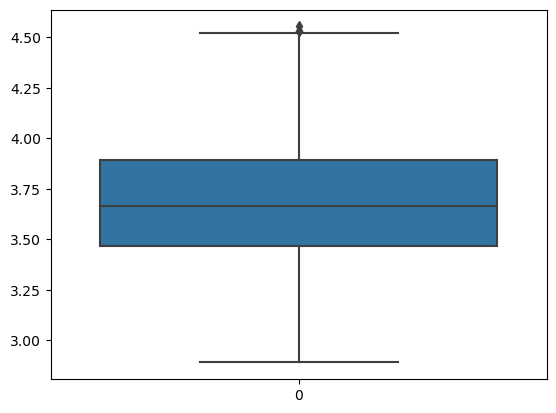

In [12]:
sns.boxplot(df.age)

2. BALANCE

<Axes: xlabel='balance', ylabel='Density'>

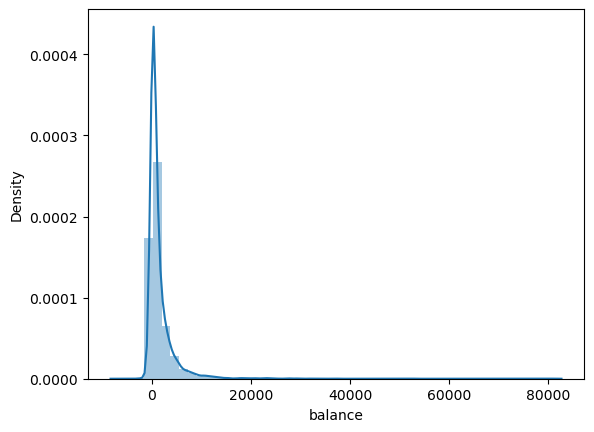

In [13]:
sns.distplot(df.balance)

<Axes: >

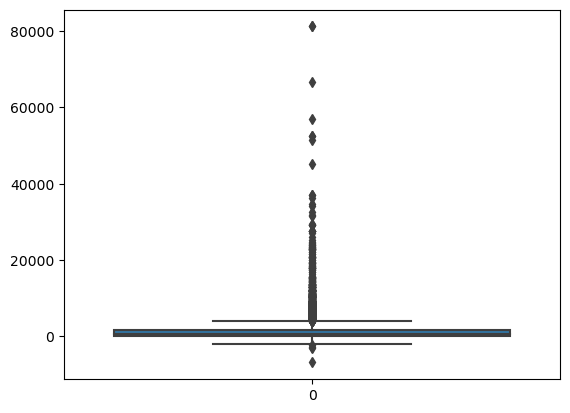

In [14]:
sns.boxplot(df.balance)

In [15]:
df.balance.describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [16]:
K=kurtosis(df['balance'])
s=skew(df['balance'])
print('k:',K)
print('s:',s)

k: 126.80394496305712
s: 8.223513810011928


<Axes: xlabel='balance', ylabel='Density'>

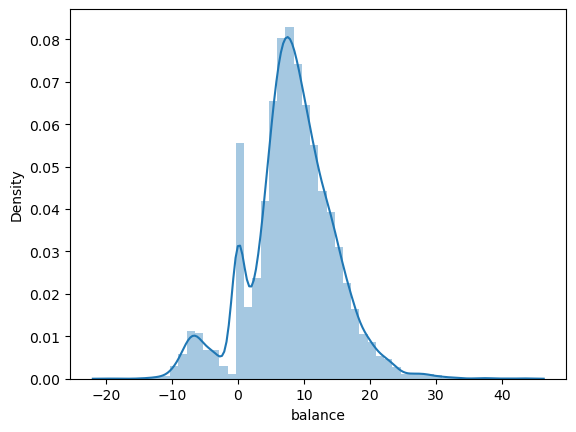

In [17]:
df['balance']=df['balance'].apply(np.cbrt)

sns.distplot(df['balance'])

3.DAY

<Axes: xlabel='day', ylabel='Density'>

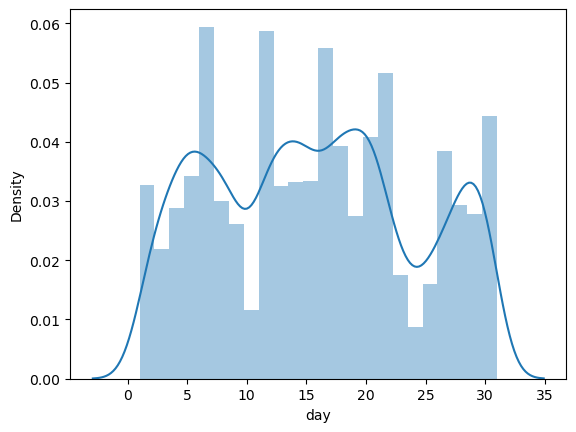

In [18]:
sns.distplot(df.day)

<Axes: >

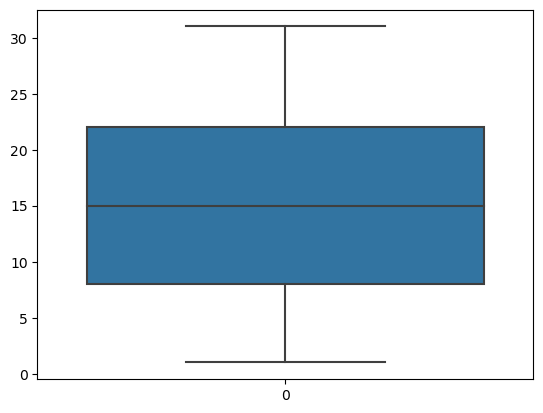

In [19]:
sns.boxplot(df.day)

4.PDAYS

<Axes: xlabel='pdays', ylabel='Density'>

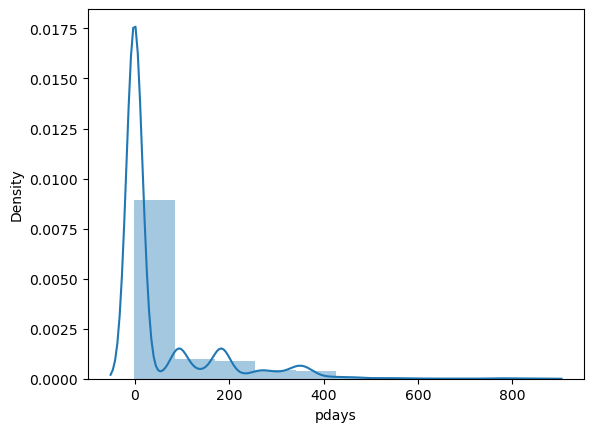

In [20]:
sns.distplot(df.pdays,bins=10)

<Axes: xlabel='pdays', ylabel='Density'>

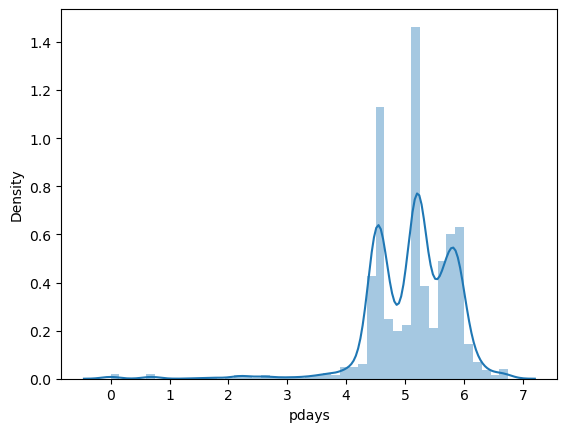

In [21]:
df['pdays']=df['pdays'].apply(np.log)

sns.distplot(df['pdays'])

<Axes: >

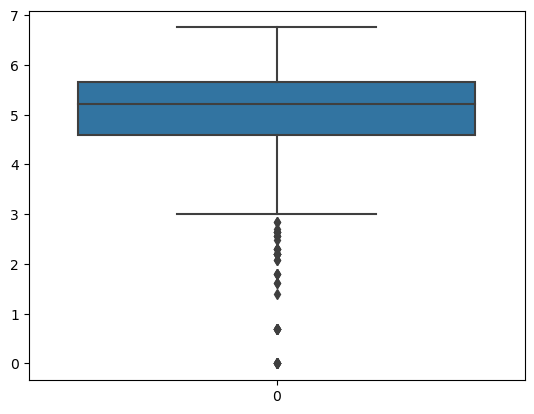

In [22]:
sns.boxplot(df.pdays)

5.DURATION

<Axes: xlabel='duration', ylabel='Density'>

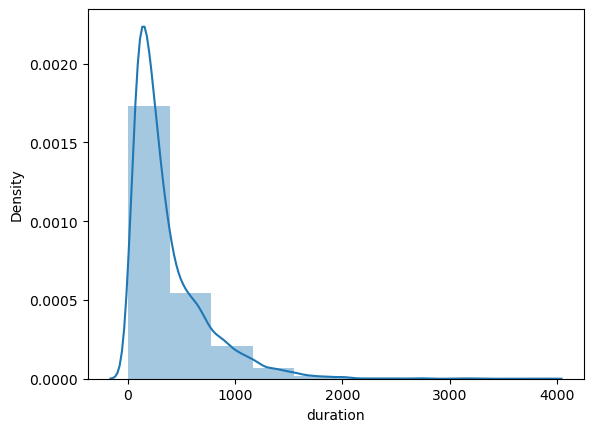

In [23]:
sns.distplot(df.duration,bins=10)

<Axes: xlabel='duration', ylabel='Density'>

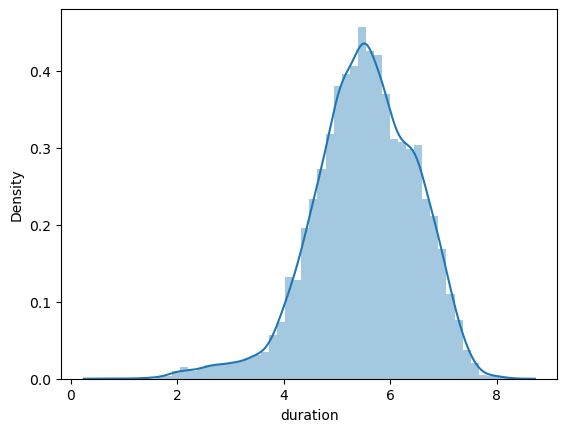

In [24]:
df['duration']=df['duration'].apply(np.log)

sns.distplot(df['duration'])

<Axes: >

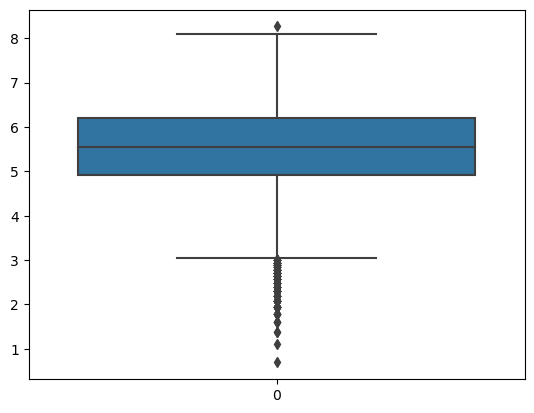

In [25]:
sns.boxplot(df.duration)

6.CAMPAIGN

<Axes: xlabel='campaign', ylabel='Density'>

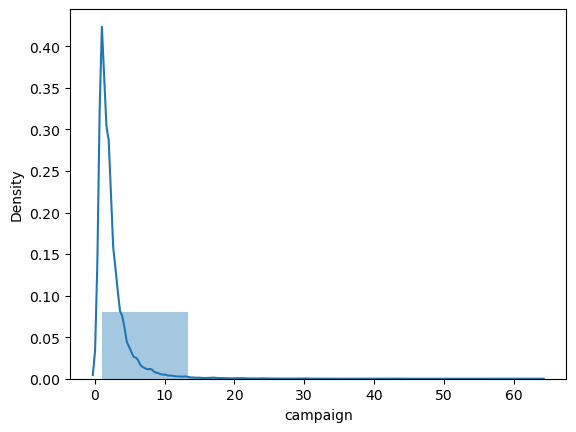

In [26]:
sns.distplot(df.campaign,bins=5)

<Axes: xlabel='campaign', ylabel='Density'>

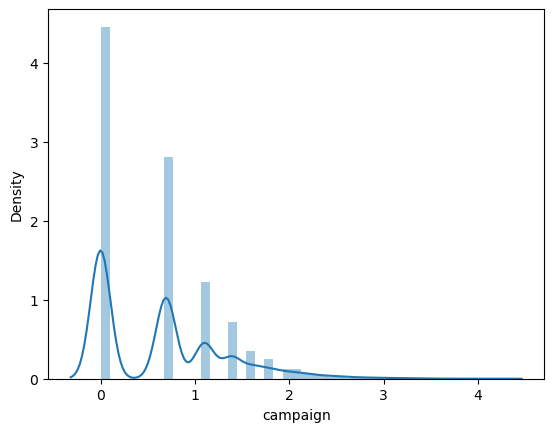

In [27]:
df['campaign']=df['campaign'].apply(np.log)

sns.distplot(df['campaign'])

<Axes: >

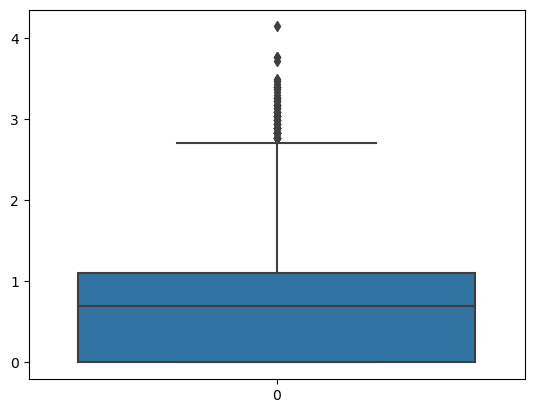

In [28]:
sns.boxplot(df.campaign)

7.PREVIOUS

<Axes: xlabel='previous', ylabel='Density'>

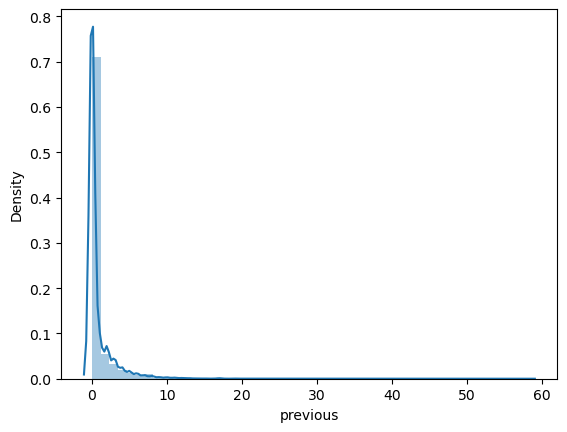

In [29]:
sns.distplot(df.previous)

<Axes: xlabel='previous', ylabel='Density'>

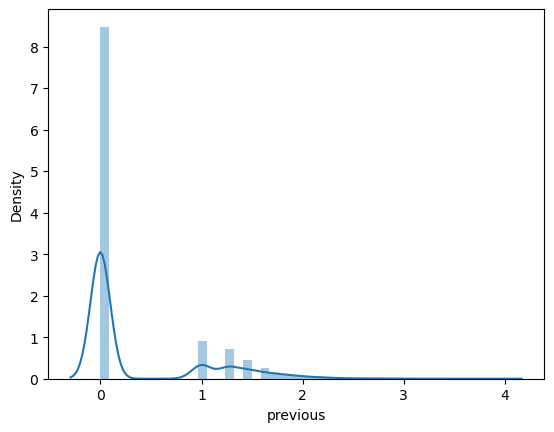

In [30]:
df['previous']=df['previous'].apply(np.cbrt)

sns.distplot(df['previous'])

<Axes: >

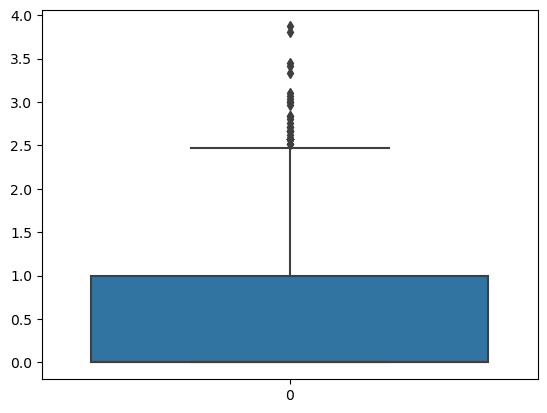

In [31]:
sns.boxplot(df.previous)

*encoding categorical variables

In [32]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [33]:
df.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

<Axes: >

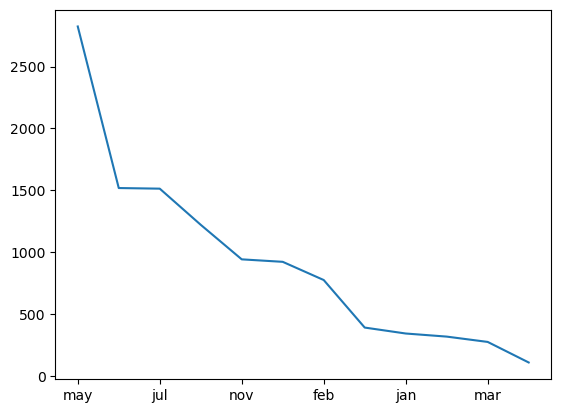

In [34]:
df.month.value_counts().plot()

In [35]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [36]:
depositmapping={'yes':1,'no':0}
df.deposit=df.deposit.map(depositmapping)

In [37]:
df.deposit.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

*job vs deposit

In [38]:
df[['job','deposit']].groupby('job').mean().sort_values('deposit',ascending=True)

,deposit
job,
blue-collar,0.364198
entrepreneur,0.375000
housemaid,0.397810
services,0.399783
technician,0.460779
self-employed,0.461728
admin.,0.473013
unknown,0.485714
management,0.507015


In [39]:
df['job']=df['job'].replace(['management','technician','unknown','admin.','housemaid','self-employed','services',
                                'blue-collar','entrepreneur'],'rare',regex=True)

In [40]:
jobmapping={'student':3,'retired':2,'unemployed':1,'rare':0}
df['job']=df['job'].map(jobmapping)

In [41]:
df['job'].value_counts()

0    9667
2     778
3     360
1     357
Name: job, dtype: int64

In [42]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [43]:
df[['marital','deposit']].groupby('marital').mean().sort_values('deposit',ascending=True)

,deposit
marital,
married,0.433790
divorced,0.481052
single,0.543491


In [44]:
statusmapping={'married':1,'divorced':2,'single':3}
df['marital']=df['marital'].map(statusmapping)

In [45]:
df['marital']

0        1
1        1
2        1
3        1
4        1
        ..
11157    3
11158    1
11159    3
11160    1
11161    1
Name: marital, Length: 11162, dtype: int64

In [46]:
df[['education','deposit']].groupby('education').mean().sort_values('deposit',ascending=True)

,deposit
education,
primary,0.394000
secondary,0.447407
unknown,0.507042
tertiary,0.541068


In [47]:
educationmapping={'primary':1,'secondary':2,'unknown':3,'tertiary':4}
df['education']=df['education'].map(educationmapping)

In [48]:
df['education']

0        2
1        2
2        2
3        2
4        4
        ..
11157    1
11158    2
11159    2
11160    2
11161    2
Name: education, Length: 11162, dtype: int64

In [49]:
df.deposit

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [50]:
df[['deposit','default']].groupby('default').mean().sort_values('deposit',ascending=True)

,deposit
default,
yes,0.309524
no,0.476351


In [51]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [52]:
defaultmapping={'no':1,'yes':2}
df['default']=df['default'].map(defaultmapping)

In [53]:
df.loan.value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [54]:
df[['deposit','loan']].groupby('loan').mean().sort_values('deposit',ascending=True)

,deposit
loan,
yes,0.331507
no,0.495259


In [55]:
loanmapping={'no':1,'yes':2}
df['loan']=df['loan'].map(loanmapping)

In [56]:
df[['deposit','contact']].groupby('contact').mean().sort_values('deposit',ascending=True)

,deposit
contact,
unknown,0.225916
telephone,0.503876
cellular,0.543273


In [57]:
contactmapping={'unknown':1,'telephone':2,'cellular':3}
df['contact']=df['contact'].map(contactmapping)

In [58]:
df['contact'].value_counts()

3    8042
1    2346
2     774
Name: contact, dtype: int64

In [59]:
df[['deposit','poutcome']].groupby('poutcome').mean().sort_values('deposit',ascending=True)

,deposit
poutcome,
unknown,0.406678
failure,0.503257
other,0.571695
success,0.913165


In [60]:
poutcomemap={'unknown':1,'failure':2,'other':3,'success':4}
df['poutcome']=df['poutcome'].map(poutcomemap)

In [61]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,4.077537,0,1,2,1,13.281815,yes,1,1,5,may,6.948897,0.000000,NaN,0.0,1,1
1,4.025352,0,1,2,1,3.556893,no,1,1,5,may,7.290975,0.000000,NaN,0.0,1,1
2,3.713572,0,1,2,1,10.829321,yes,1,1,5,may,7.236339,0.000000,NaN,0.0,1,1
3,4.007333,0,1,2,1,13.528518,yes,1,1,5,may,6.361302,0.000000,NaN,0.0,1,1
4,3.988984,0,1,4,1,5.687734,no,1,1,5,may,6.511745,0.693147,NaN,0.0,1,1


In [62]:
df[['deposit','month']].groupby('month').mean().sort_values('deposit',ascending=True)

,deposit
month,
may,0.327550
jan,0.412791
jul,0.414135
nov,0.427359
jun,0.446809
aug,0.452930
feb,0.568299
apr,0.625135
oct,0.823980


In [63]:
df['month']=df['month'].replace(['mar','dec','sep','oct'],2,regex=True)
df['month']=df['month'].replace(['apr','feb','aug','jun'],1,regex=True)
df['month']=df['month'].replace(['nov','jul','jan','may'],0,regex=True)

*Feature selection

In [64]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


X = df[['age', 'job', 'marital', 'education', 'default', 'balance',
       'loan', 'contact', 'month', 'duration', 'campaign',
        'poutcome']]  #independent columns
y = df['deposit']    #target column i.e price range
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [65]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.12560762 0.02248116 0.02428383 0.03679668 0.00294073 0.13570752
 0.01294946 0.05086652 0.06883173 0.37539206 0.06298714 0.08115555]


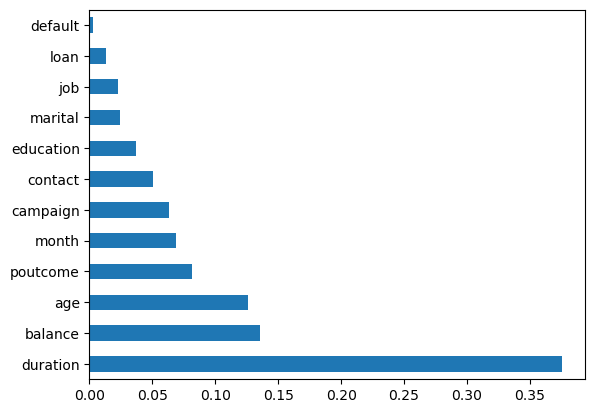

In [66]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [67]:
nrows=len(df.index)
percentage=round((nrows*70)/100)
trainingData=df.iloc[:percentage,:]
testData=df.iloc[percentage:,:]

print("Number of training data examples "+str(len(trainingData.index)))
print("Number of test examples "+str(len(testData.index)))

Number of training data examples 7813
Number of test examples 3349


In [68]:
train_x=trainingData[['age','loan','month','poutcome','balance','campaign','contact','duration','education']]
train_y=trainingData["deposit"]

test_x=testData[['age','loan','month','poutcome','balance','campaign','contact','duration','education']]
test_y=testData["deposit"]

train_x.head()

#featureNames=["job","marital","education","age","balance","day","pdays","duration"]
#classNames=[1,0]

,age,loan,month,poutcome,balance,campaign,contact,duration,education
0,4.077537,1,0,1,13.281815,0.000000,1,6.948897,2
1,4.025352,1,0,1,3.556893,0.000000,1,7.290975,2
2,3.713572,1,0,1,10.829321,0.000000,1,7.236339,2
3,4.007333,1,0,1,13.528518,0.000000,1,6.361302,2
4,3.988984,1,0,1,5.687734,0.693147,1,6.511745,4


In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [71]:
y_pred_gini = clf_gini.predict(test_x)

[Text(0.5, 0.875, 'x[7] <= 5.091\ngini = 0.437\nsamples = 7813\nvalue = [2524, 5289]'),
 Text(0.25, 0.625, 'x[2] <= 1.5\ngini = 0.413\nsamples = 1849\nvalue = [1310, 539]'),
 Text(0.125, 0.375, 'x[3] <= 3.5\ngini = 0.354\nsamples = 1642\nvalue = [1265, 377]'),
 Text(0.0625, 0.125, 'gini = 0.311\nsamples = 1539\nvalue = [1243, 296]'),
 Text(0.1875, 0.125, 'gini = 0.336\nsamples = 103\nvalue = [22, 81]'),
 Text(0.375, 0.375, 'x[7] <= 4.357\ngini = 0.34\nsamples = 207\nvalue = [45, 162]'),
 Text(0.3125, 0.125, 'gini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.4375, 0.125, 'gini = 0.255\nsamples = 187\nvalue = [28, 159]'),
 Text(0.75, 0.625, 'x[7] <= 5.901\ngini = 0.324\nsamples = 5964\nvalue = [1214, 4750]'),
 Text(0.625, 0.375, 'x[6] <= 1.5\ngini = 0.444\nsamples = 2592\nvalue = [861, 1731]'),
 Text(0.5625, 0.125, 'gini = 0.155\nsamples = 306\nvalue = [280, 26]'),
 Text(0.6875, 0.125, 'gini = 0.379\nsamples = 2286\nvalue = [581, 1705]'),
 Text(0.875, 0.375, 'x[7] <= 6.419\ngini = 0

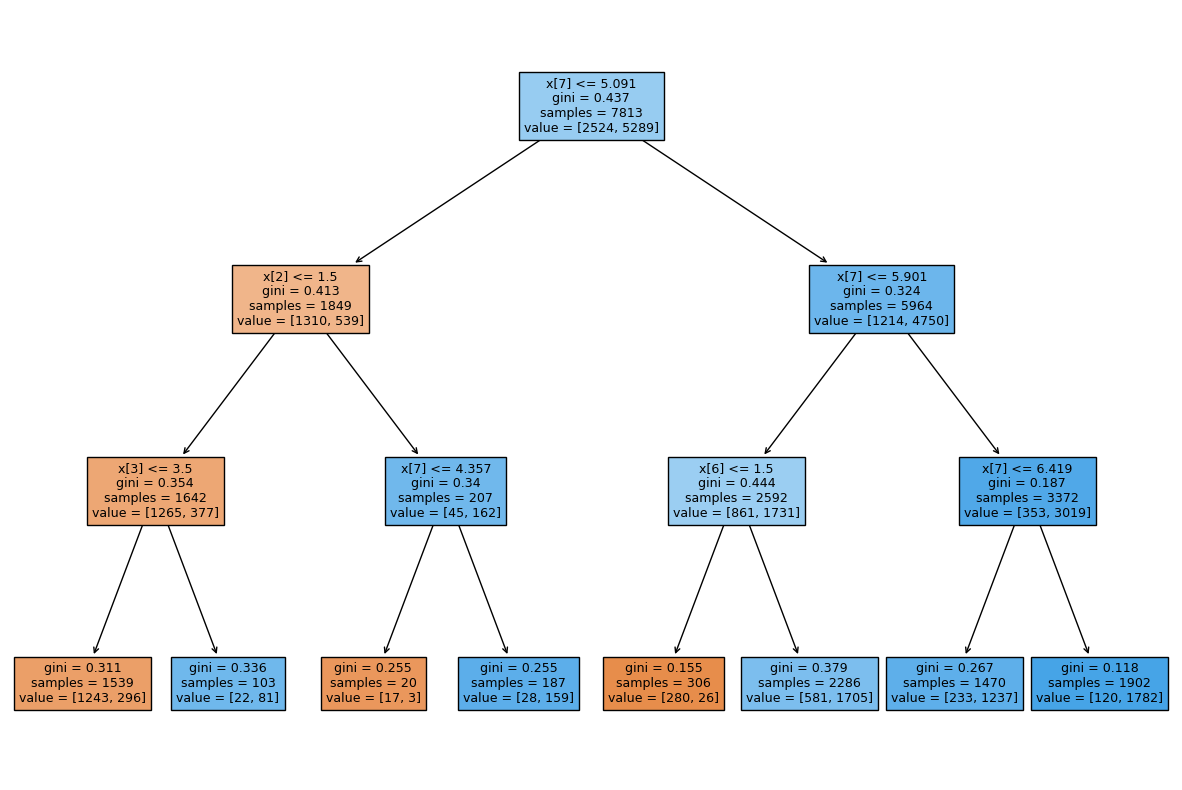

In [72]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_gini,filled=True)

In [73]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(test_y, y_pred_gini)))

Model accuracy score with criterion gini index: 0.5823


In [74]:
y_pred_train_gini = clf_gini.predict(train_x)

y_pred_train_gini

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [75]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_y, y_pred_train_gini)))

Training-set accuracy score: 0.8325


In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
print(classification_report(test_y,y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74      3349
           1       0.00      0.00      0.00         0

    accuracy                           0.58      3349
   macro avg       0.50      0.29      0.37      3349
weighted avg       1.00      0.58      0.74      3349



In [78]:
cm=confusion_matrix(test_y,y_pred_gini)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[1950 1399]
 [   0    0]]
Accuracy of prediction: 0.582


*Training the Random Forest model

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(train_x, train_y)

RandomForestClassifier(n_estimators=300)

*Predictions and Evaluation

In [80]:
rfc_pred = rfc.predict(test_x)

In [81]:
print(classification_report(test_y,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.83      3349
           1       0.00      0.00      0.00         0

    accuracy                           0.70      3349
   macro avg       0.50      0.35      0.41      3349
weighted avg       1.00      0.70      0.83      3349



In [82]:
cm=confusion_matrix(test_y,rfc_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[2353  996]
 [   0    0]]
Accuracy of prediction: 0.703
